In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [10]:
# Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify
# datasets while retaining as much of the original variance (information) as possible.
# PCA identifies the directions (principal components) along which the variance of the data is maximized. 
# Suppose you have a dataset with many correlated variables ->
# PCA will transform this dataset into a new coordinat system 
# where the new axes (principal components) are orthogonal (uncorrelated) to each other
# and ordered by the amount of variance they explain in the data.

In [ ]:
#------------------- PCA steps:---------------------------------------------
# 1. Load the whole dataset and take the features (not class labels)
# 2. Compute the d-dimensional mean vector (means for all features - each column)
#           mean = 1/n * sum [x_[i]] (for i in range (1,n)) 
#                   where, n = number of samples
# 3. Find the difference between each sample and mean_vector. This will give the centered matrix X_c
# 4. Use this X_c and derive the scatter matrix (alternatively, covariance matrix)
#           S = X_c.T @ X_c 
#        this will tell how the features (variables) are correlated)
# 5. Compute the eigenvectors e_1, e_2, ... , e_d and corresponding eigenvalues (lambda_1, lambda_2, ..., lambda_d)
# 6. Sort the eigenvectors based on decreasing eigenvalues and choose first p eigenvectors with the larger
#   eigenvalues. The eigenvector with largest eigenvalues will show the most variance (information) on the dataset
# 7. Use this dxp eigenvector matrix to transform the samples into new subspace. 
#            y = A.T @ x
# x: dx1 one sample from dataset
# y: px1 sample in the new subspace.

# Additional notes: 
# The projection using the original data set and the one using the zero
# mean will be different.

In [ ]:
# Step 1. Load IRIS dataset
iris = load_iris()
X = iris.data       # shape 150 x 4
y = iris.target
feature_names = iris.feature_names

In [ ]:
# Convert to DataFrame for readibility
df = pd.DataFrame(X, columns=feature_names)
df["Class"] = y 
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# Step 2 and Step 3: find mean and center the data for X
X_mean = np.mean(X, axis=0)
X_c = X - X_mean

X_c[:10, :]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333],
       [-0.44333333,  0.84266667, -2.058     , -0.79933333],
       [-1.24333333,  0.34266667, -2.358     , -0.89933333],
       [-0.84333333,  0.34266667, -2.258     , -0.99933333],
       [-1.44333333, -0.15733333, -2.358     , -0.99933333],
       [-0.94333333,  0.04266667, -2.258     , -1.09933333]])

In [20]:
# Step 4: Calculate scatter matrix
# Equation (Scatter):       S = sum [x_i - mean] @ [x_i - mean].T (for i in range(1,n))
# Equation (Scatter brief): S = X_c.T . X_c
# Equation (Covariance):    C = 1/(n-1) * S = 1/(n-1) * X_c.T . X_c

scatter_matrix = X_c.T @ X_c 
cov_matrix = np.cov(X_c, rowvar=False)
scatter_matrix, cov_matrix

(array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
        [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
        [189.873     , -49.1188    , 464.3254    , 193.0458    ],
        [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]]),
 array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]]))

In [22]:
# Compute eigenvectors and eigenvalues:
# Eigenvalue problem: C.e = lambda.e (or S.e = lambda.e)
# e -> eigenvectors, lambda -> eigenvalues, C -> covariance matrix
# Solve det(C - lambda.I) = 0 equation to get eigenvalues lambda1,...lambda4
# For each eigenvalue lambda: solve (C - lambda.I).e = 0 to get eigenvectors
# For this problem we must have the following results:
# 4 eigenvalues: lambda_1, lambda_2, lambda_3, lambda_4
# 4 corresponding eigenvectors: e_1, e_2, e_3, e_4 (each of size R^4) 

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [38]:
# Numerical example:
# From PCA dataset we obtained the following eigenvalues:
# lambda_1 = 4.226, lambda_2 = 0.2426, lambda_3 = 0.0782, lambda_4 = 0.0238
# e_1 = [ 0.36138659, -0.65658877, -0.58202985,  0.31548719]
# e_2 = [-0.08452251, -0.73016143,  0.59791083, -0.3197231  .....
# ...
# now we must sort the eigenvalues: lambda_1 > lambda_2 > lambda_3 > lambda_4
# Choose top p eigenvectors (for this case p=1 for 1D PCA)
# Therefore, we will pick up A = e_1 (eigenvalue corresponding to lambda_1)
# Transform data into new subspace: y = A^T.X_c
# This is the projection direction.

idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:,idx]
sorted_eigenvalues, sorted_eigenvectors

# top eigenvectors 
p = 1
A = sorted_eigenvectors[:, :p] # shape (4, p)

# project the data
Y = X_c @ A  
Y[:5, :]

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654]])

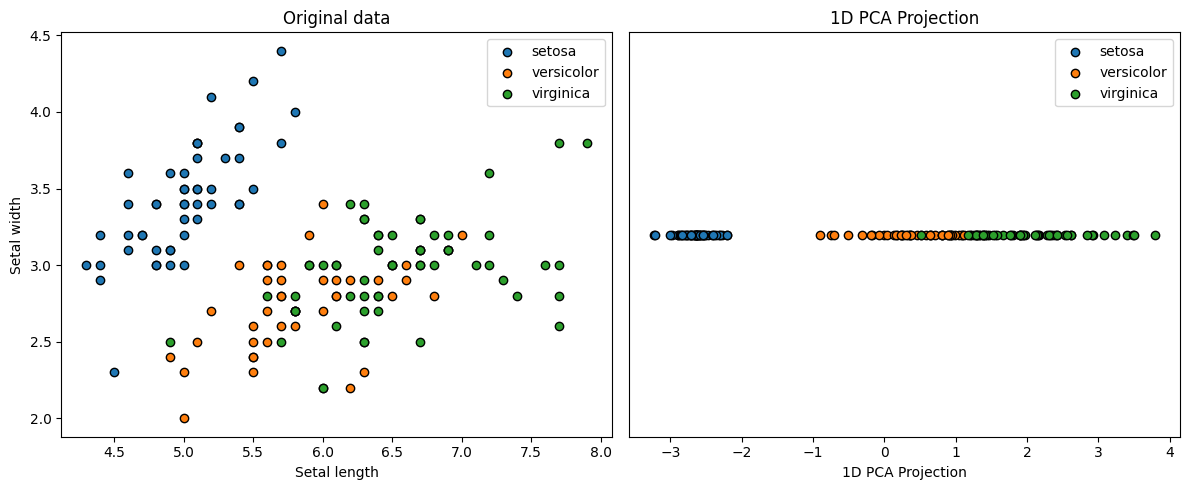

In [60]:
# Visualization part

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
labels = iris.target_names


# original data
for i,label in enumerate(labels):
    plt.scatter(X[y==i,0], X[y==i,1],  label = label,edgecolors='k')
plt.xlabel("Setal length")
plt.ylabel("Setal width")
plt.legend()
plt.title("Original data")


# projected data
plt.subplot(1,2,2)
for i, label in enumerate(labels):
    plt.scatter(Y[y==i], [0]*np.sum(y==i),label=label,edgecolor='k')
plt.xlabel("1D PCA Projection")
plt.yticks([])
plt.legend()
plt.title("1D PCA Projection")
plt.tight_layout()
plt.show()



In [67]:
# 2D PCA Projection

p = 2 
A = sorted_eigenvectors[:, :p]
Y = X_c @ A 
Y.shape

(150, 2)

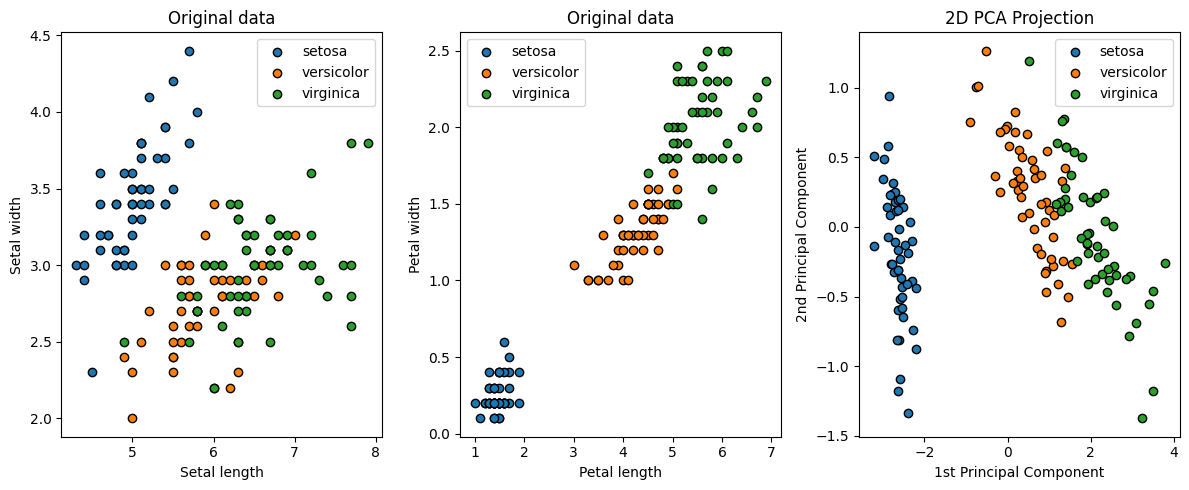

In [ ]:
# Visualization part

plt.figure(figsize=(12,5))
labels = iris.target_names


# original data with sepal length and sepal width
plt.subplot(1,3,1)
for i,label in enumerate(labels):
    plt.scatter(X[y==i,0], X[y==i,1],  label = label,edgecolors='k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.title("Original data")


# original data with petal length and petal width
plt.subplot(1,3,2)
for i,label in enumerate(labels):
    plt.scatter(X[y==i,2], X[y==i,3],  label = label,edgecolors='k')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Original data")


# projected data
plt.subplot(1,3,3)
for i, label in enumerate(labels):
    plt.scatter(Y[y==i,0], Y[y==i,1],label=label,edgecolor='k')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend()
plt.title("2D PCA Projection")
plt.tight_layout()
plt.show()



In [75]:
for i, vec in enumerate(A.T):
    print(f'PC{i+1} loadings:', vec)


PC1 loadings: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
PC2 loadings: [-0.65658877 -0.73016143  0.17337266  0.07548102]


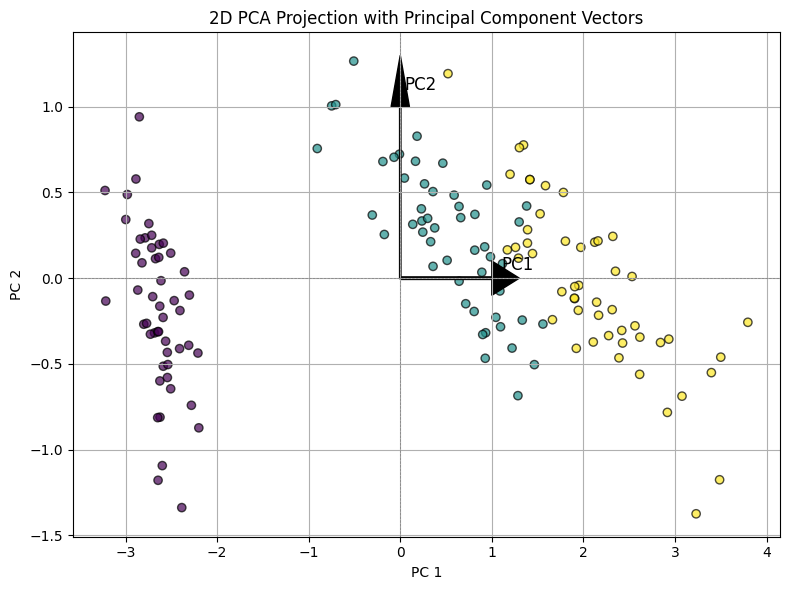

In [ ]:
# Plot the projected data (2D PCA)
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D PCA Projection with Principal Component Vectors')

# Add unit-length PC1 and PC2 arrows (just basis directions) 
# to show variance direction
origin = np.zeros(2)
pc1_vec = [1, 0]
pc2_vec = [0, 1]

plt.arrow(*origin, *pc1_vec, color='black', width=0.015, head_width=0.2, label='PC1')
plt.arrow(*origin, *pc2_vec, color='black', width=0.015, head_width=0.2, label='PC2')

plt.text(1.1, 0.05, 'PC1', fontsize=12, color='black')
plt.text(0.05, 1.1, 'PC2', fontsize=12, color='black')

plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [79]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
